# **Winequality Prediction**

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,classification_report

from sklearn.model_selection import GridSearchCV

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
# Load the Datasetr
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Chacking for missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

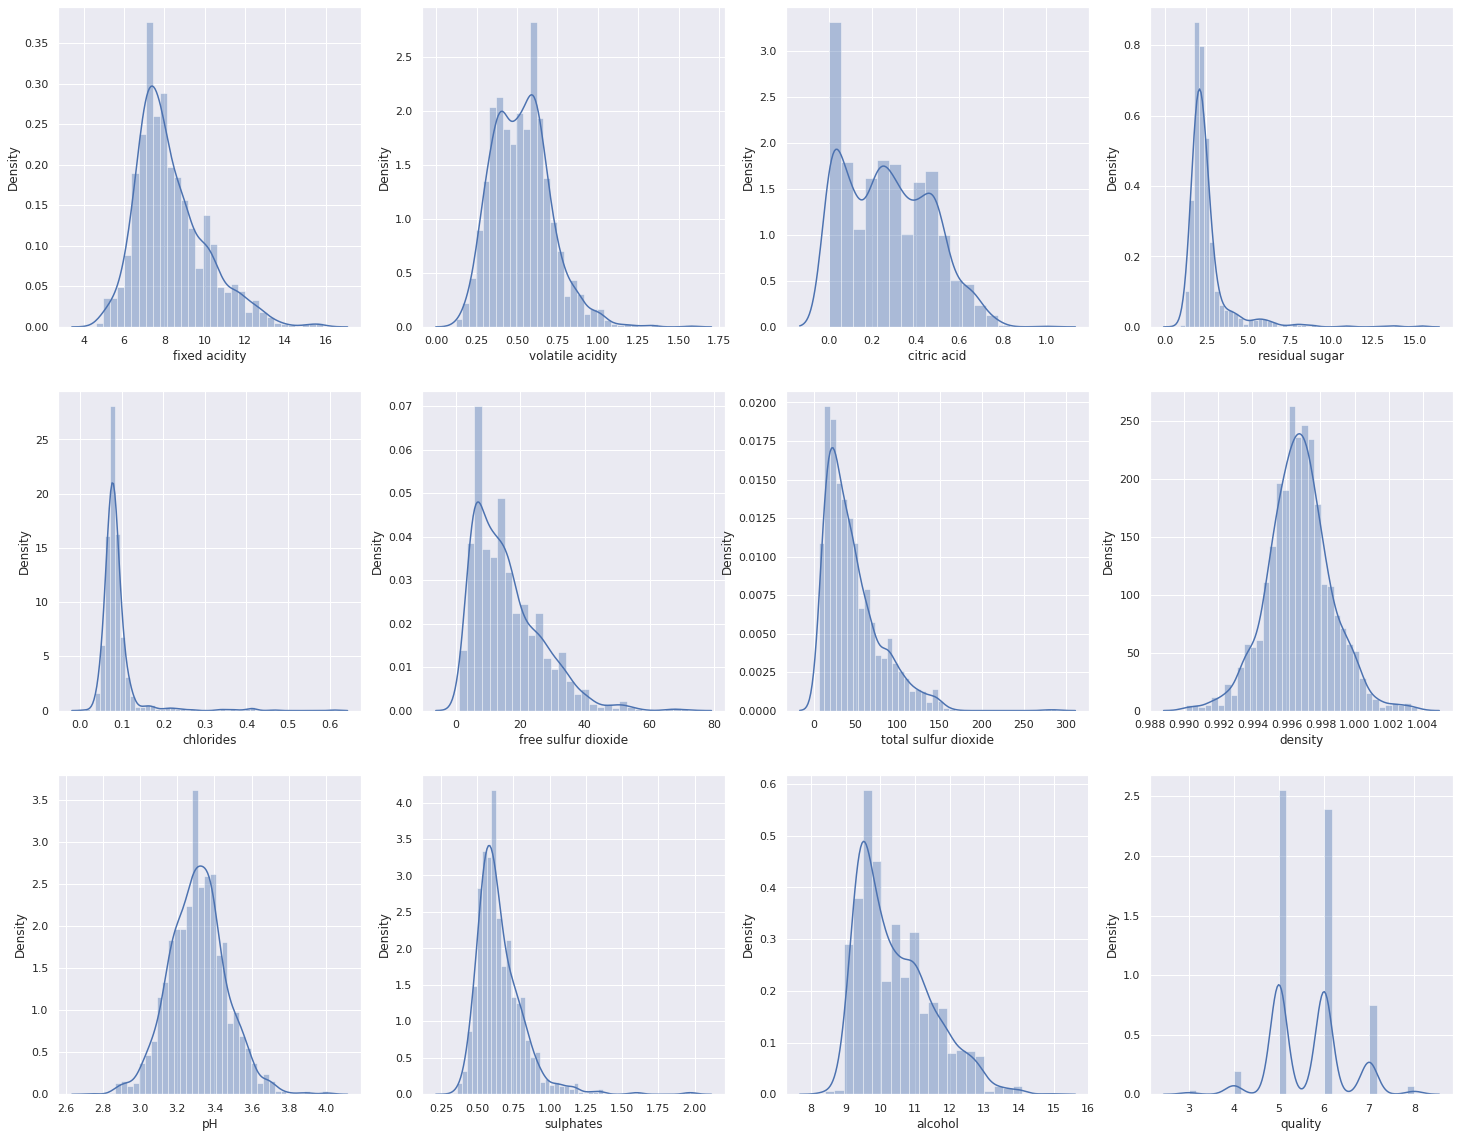

In [8]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    ax = plt.subplot(3,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

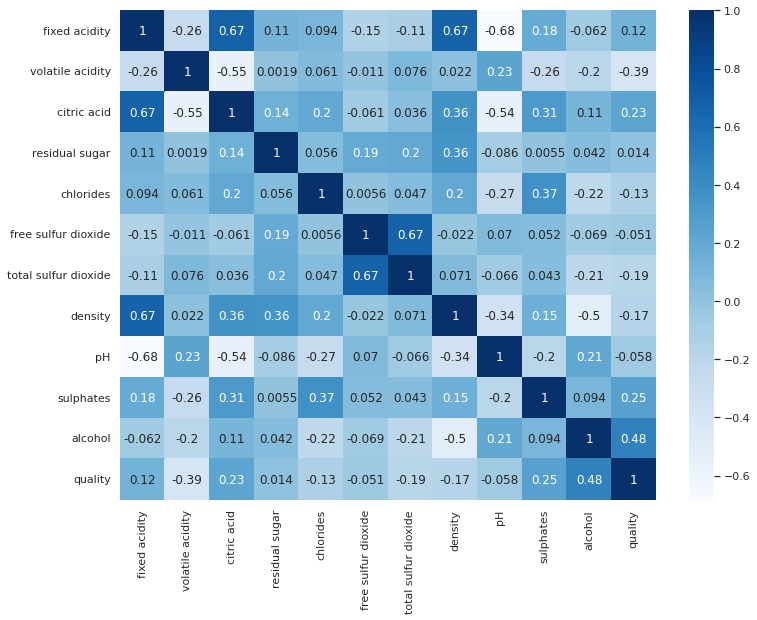

In [9]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='Blues',annot = True)
plt.show()

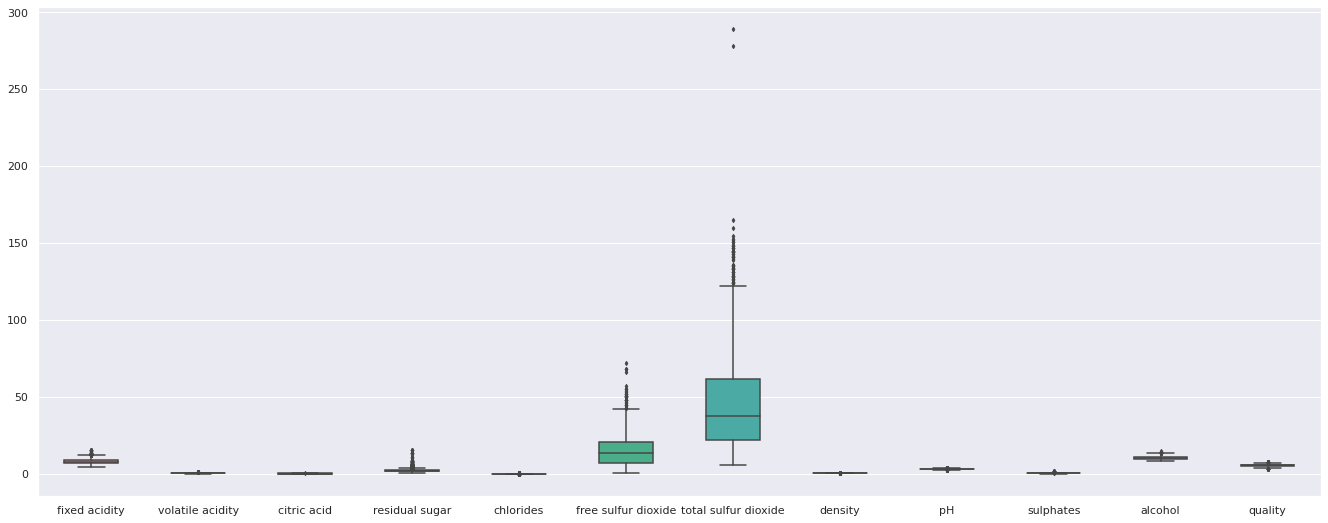

In [10]:
fig,ax = plt.subplots(figsize = (23,9))
sns.boxplot(data=df,width = 0.5,fliersize = 3,ax=ax)

**handling Outlier**

In [11]:
# total sulfur dioxide
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']>200,df['total sulfur dioxide'].median(),df['total sulfur dioxide'])

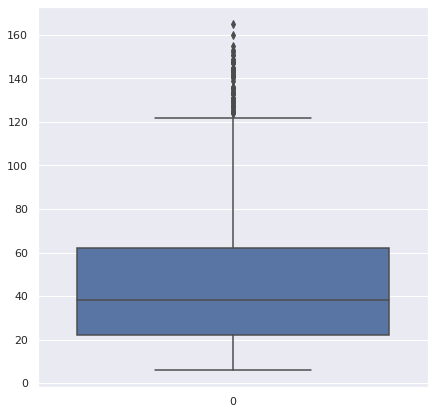

In [12]:
plt.figure(figsize=(7,7))
sns.boxplot(data = df["total sulfur dioxide"])
plt.show()

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Split Independent and Dependent Features**

In [14]:
X = df.drop(columns = ["quality"],axis=1)
y = df["quality"]

In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

**Feature Scaling**

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [18]:
X_train

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

**Variance Inflation Factor**

In [19]:
variables = X_train

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

In [20]:
vif

,VIF,Features
0,7.798031,fixed acidity
1,1.786661,volatile acidity
2,3.094005,citric acid
3,1.701253,residual sugar
4,1.477820,chlorides
5,1.991629,free sulfur dioxide
6,2.191339,total sulfur dioxide
7,6.392410,density
8,3.317868,pH
9,1.430500,sulphates


**Splitting the data for training and Testing**

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y,test_size = 0.25,random_state = 10)

In [22]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1199, 11)
Shape of X Test:  (400, 11)
Shape of y Train:  (1199,)
Shape of y Test:  (400,)


**Model Building**

**1. Implementing SVC**

In [23]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [24]:
model.predict(X_test)

array([6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,

In [25]:
y_pred = model.predict(X_test)

In [26]:
# Accuracu of the Model

print("Accuracy_Score for SVC: ", round(accuracy_score(y_test,y_pred)*100,3),"%")

Accuracy_Score for SVC:  61.0 %


In [27]:
# Comparing Actiual value and Predicted value

df1 = pd.DataFrame({"Actual Value" : y_test,
                    "Predicted Value": y_pred})
df1.head(20)

,Actual Value,Predicted Value
1518,5,6
1246,5,5
544,6,6
1343,6,6
428,5,5
1190,6,7
1056,7,6
361,6,6
367,5,6
1401,5,5


**Implementing Grid Search**

In [28]:
param_grid = {
    "C" : [0.1,1,10,50,100,500],
    "gamma" : [1,0.5,0.1,0.01,0.001]
}

In [29]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3,n_jobs = -1)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=3)

In [31]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [32]:
model_new1 = SVC(C = 10, gamma = 1)
model_new1.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [33]:
accuracy_score(y_test,model_new1.predict(X_test))

0.63

**2. Implementing DTC**

In [34]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
model1.predict(X_test)

array([7, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 4, 5, 6, 6, 5, 6, 7,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 4, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 6, 7, 7, 6, 5, 7, 5, 8, 4, 7, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 7, 7, 5, 6, 5, 6, 6, 5, 5,
       4, 5, 7, 5, 7, 6, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 6, 5, 6, 4, 6, 5,
       5, 7, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 4, 5, 6, 5, 5, 6, 5,
       8, 6, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7,
       6, 6, 5, 6, 4, 6, 6, 6, 7, 5, 7, 6, 6, 7, 6, 5, 5, 5, 7, 6, 5, 3,
       4, 5, 5, 6, 5, 6, 6, 7, 5, 4, 6, 6, 5, 5, 5, 7, 6, 7, 6, 5, 4, 5,
       6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 4, 6, 6, 5, 5, 6, 6, 5, 5, 6,
       5, 6, 5, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       4, 6, 6, 5, 5, 5, 5, 4, 5, 6, 5, 5, 5, 6, 7, 7, 7, 7, 5, 5, 7, 6,
       6, 4, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 7, 6, 7, 6, 6, 6,

In [36]:
y_pred = model1.predict(X_test)

In [37]:
# Accuracu of the Model

print("Accuracy_Score for DTC: ", round(accuracy_score(y_test,y_pred)*100,3),"%")

Accuracy_Score for DTC:  56.0 %


In [38]:
# Comparing Actiual value and Predicted value

df2 = pd.DataFrame({"Actual Value" : y_test,
                    "Predicted Value": y_pred})
df2.head(20)

,Actual Value,Predicted Value
1518,5,7
1246,5,6
544,6,6
1343,6,6
428,5,6
1190,6,7
1056,7,5
361,6,6
367,5,6
1401,5,5


In [39]:
param_grid1 = {'criterion':['gini','entropy'],
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [40]:
grid1 = GridSearchCV(DecisionTreeClassifier(),param_grid1,verbose=3,n_jobs=-1)

In [41]:
grid1.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=3)

In [42]:
grid1.best_params_

{'criterion': 'entropy', 'max_depth': 30}

In [43]:
model_new1 = DecisionTreeClassifier(criterion='gini', max_depth=50)
model_new1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50)

In [44]:
accuracy_score(y_test,model_new1.predict(X_test))

0.575

**3. Implementing RFC**

In [45]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
model.predict(X_test)

array([6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,

In [47]:
y_pred = model3.predict(X_test)

In [48]:
# Accuracu of the Model

print("Accuracy_Score for DTC: ", round(accuracy_score(y_test,y_pred)*100,3),"%")

Accuracy_Score for DTC:  67.75 %


In [49]:
df3 = pd.DataFrame({
    "Actual Value" : y_test,
    "Predicted Value" : y_pred
})

df3.head(20)

,Actual Value,Predicted Value
1518,5,6
1246,5,5
544,6,6
1343,6,6
428,5,6
1190,6,7
1056,7,6
361,6,6
367,5,6
1401,5,5
